# Import Library & Dataset

In [1]:
import pandas as pd
import numpy as np

DATA_PATH = '../data/cleaned_outliers_data_saudi_used_cars.csv'
OUTPUT_PATH = '../data/feature_engineered_saudi_used_cars.csv'
df = pd.read_csv(DATA_PATH)
print(df.shape)
df.head()

(3816, 11)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000


# Feature Engineering

## Feature Creation

### Car Age

In [2]:
# -- Car Age: More predictive than raw Year --
CURRENT_YEAR = 2022
df['Car_Age'] = CURRENT_YEAR - df['Year']
# Business logic: car age is a more monotonic predictor of price drop
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Car_Age
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000,8
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,7
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,7
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000,3
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000,10


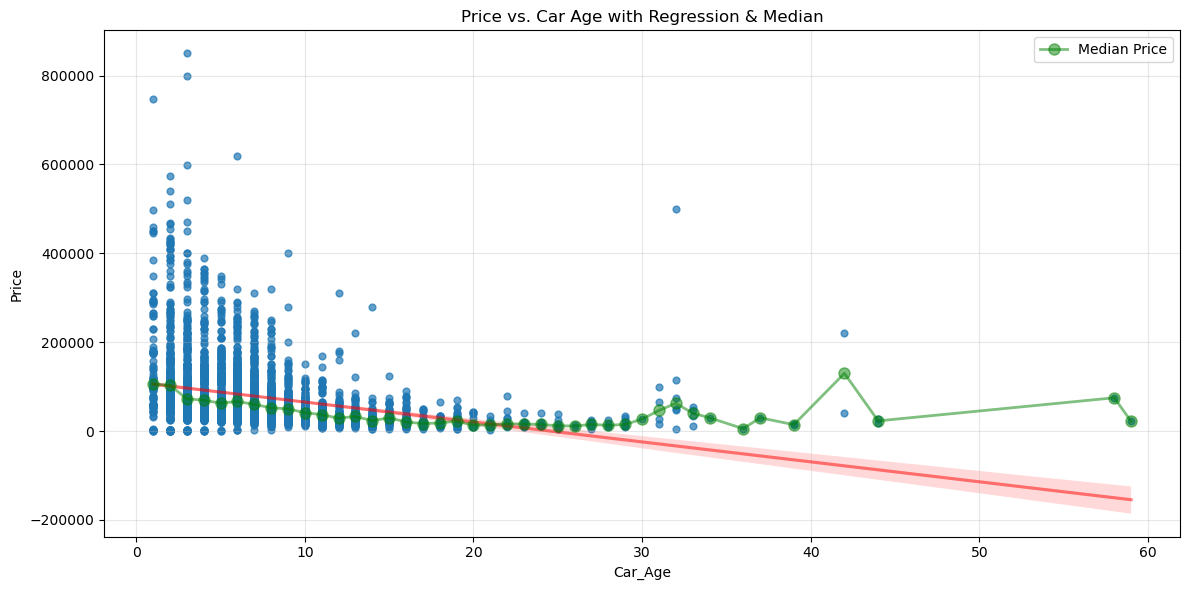

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric_relationship(
    df, 
    x_col, 
    y_col, 
    show_medians=True, 
    figsize=(12,6), 
    scatter_alpha=0.5,
    reg_color='red',
    median_color='green',
    median_label='Median Y',
    ylim=None,
    xlim=None,
    median_kwargs=None,
    reg_kwargs=None,
    title=None
):
    """
    Plots y_col vs. x_col with regression line and optional median y per unique x value.

    Args:
        df (pd.DataFrame): DataFrame with data.
        x_col (str): Name of x-axis column (must be numeric/discrete).
        y_col (str): Name of y-axis column.
        show_medians (bool): Plot median y per x if True.
        figsize (tuple): Figure size.
        scatter_alpha (float): Alpha for scatter.
        reg_color (str): Color for regression line.
        median_color (str): Color for median line.
        median_label (str): Legend label for median.
        ylim (tuple or None): Y-axis limits.
        xlim (tuple or None): X-axis limits.
        median_kwargs (dict or None): Additional kwargs for median line.
        reg_kwargs (dict or None): Additional kwargs for sns.regplot().
        title (str or None): Custom plot title.
    """
    plt.figure(figsize=figsize)
    # Regression and scatter
    regplot_kwargs = dict(
        x=x_col,
        y=y_col,
        data=df,
        scatter_kws={'alpha': scatter_alpha, 's': 24},
        line_kws={'color': reg_color, 'alpha': 0.5},
    )
    if reg_kwargs:
        regplot_kwargs.update(reg_kwargs)
    sns.regplot(**regplot_kwargs)
    
    # Median line (for discrete/ordinal/nice integer x)
    if show_medians:
        unique_x = np.sort(df[x_col].unique())
        medians = df.groupby(x_col)[y_col].median().reindex(unique_x)
        mkws = dict(color=median_color, linewidth=2, markersize=8, label=median_label, alpha=0.5)
        if median_kwargs:
            mkws.update(median_kwargs)
        plt.plot(unique_x, medians, 'o-', **mkws)
        plt.legend()
    if title is not None:
        plt.title(title)
    else:
        plt.title(f'{y_col} vs. {x_col} (Regression{" & Median" if show_medians else ""})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True, alpha=0.3)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.tight_layout()
    plt.show()
    
plot_numeric_relationship(
    df, 
    x_col='Car_Age', 
    y_col='Price', 
    show_medians=True, 
    figsize=(12, 6), 
    scatter_alpha=0.7,
    reg_color='red',
    median_color='green',
    median_label='Median Price',
    title='Price vs. Car Age with Regression & Median'
)

In [4]:
correlation_car_age = df['Car_Age'].corr(df['Price'])
print(f"Correlation between Car Age and Price: {correlation_car_age:.4f}")

# Compute correlation between Year and Price
correlation_year = df['Year'].corr(df['Price'])
print(f"Correlation between Year and Price: {correlation_year:.4f}")

Correlation between Car Age and Price: -0.3152
Correlation between Year and Price: 0.3152


### Vintage Cars (IsVintage)

In [5]:
# -- Vintage Flag: Flag cars that are "classic" or "vintage", which is indicated by a Car Age of 30 years or older --
df['IsVintage'] = (df['Car_Age'] >= 30)
df[df['IsVintage']].head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Car_Age,IsVintage
42,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0,500000,False,5500,36,True
205,Land Cruiser Pickup,Aseer,Toyota,Manual,Saudi,Standard,1983,1.5,2580,False,15000,39,True
287,SEL,Dammam,Mercedes,Automatic,Other,Full,1990,4.0,89000,False,75000,32,True
444,Other,Qassim,Other,Manual,Other,Standard,1980,2.4,2500,False,220000,42,True
960,Land Cruiser,Najran,Toyota,Manual,Saudi,Semi Full,1988,4.0,195000,False,30000,34,True


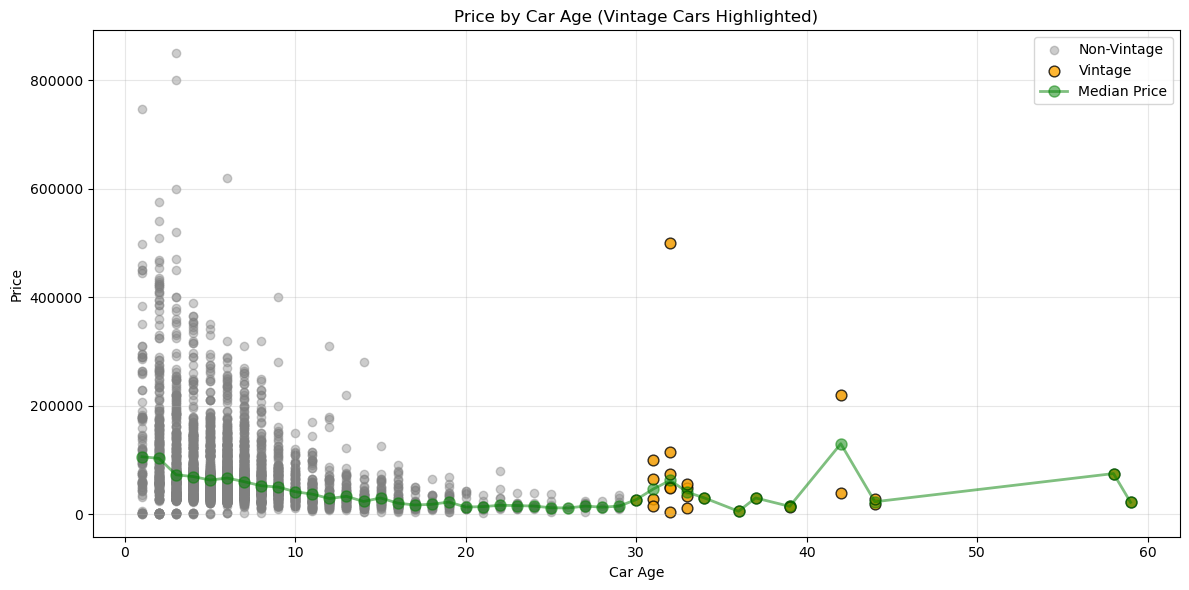

In [6]:
plt.figure(figsize=(12, 6))
# Plot all cars
plt.scatter(df['Car_Age'], df['Price'], alpha=0.4, label='Non-Vintage', color='gray')
# Highlight vintage cars
vintage_mask = df['IsVintage'] == True
plt.scatter(df.loc[vintage_mask, 'Car_Age'], df.loc[vintage_mask, 'Price'], 
            alpha=0.8, label='Vintage', color='orange', edgecolor='black', s=60)

# Median price per Car_Age
medians = df.groupby('Car_Age')['Price'].median()
plt.plot(medians.index, medians.values, 'o-', color='green', linewidth=2, markersize=8, label='Median Price', alpha=0.5)

plt.xlabel('Car Age')
plt.ylabel('Price')
plt.title('Price by Car Age (Vintage Cars Highlighted)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Big Engine Cars (IsBigEngine)

In [7]:
# -- Big Engine Flag: Flag abnormally high-performance vehicles
df['IsBigEngine'] = (df['Engine_Size'] > 7.0)
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Car_Age,IsVintage,IsBigEngine
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000,8,False,True
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,7,False,False
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,7,False,False
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000,3,False,False
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000,10,False,False


## Feature Transformation

Log-transform skewed numerical columns

In [40]:
def analyze_features(df, target_var='Price', low_card_thresh=10):
  """
  Analyze dataframe features for modeling:
  - Identifies categorical and numerical columns (excluding target)
  - Detects highly skewed numeric columns
  - Splits categoricals into low/high cardinality
  - Prints summary

  Returns:
    cat_cols, num_cols, skewed_cols, low_card_cat, high_card_cat
  """
  # Categorical columns for future pipeline/modeling
  cat_cols = (
    df
      .select_dtypes(include=['object','bool','category'])
      .drop(columns=[target_var], errors='ignore')
      .columns
      .tolist()
  )

  # Numerical columns (excluding target)
  num_cols = (
    df
      .select_dtypes(include=['int64','float64'])
      .drop(columns=[target_var])
      .columns
      .tolist()
  )

  print("Categorical variables:", cat_cols)
  print("Numerical variables:", num_cols)
  print("Target variable:", target_var)

  # detect highly-skewed numerics for log1p transform
  skewed_cols = [c for c in num_cols if abs(df[c].skew()) > 1.0]
  print("Highly skewed numeric columns:", skewed_cols)

  print("\n>> category cardinalities:")
  for c in cat_cols:
    print(f"   {c:12s}: {df[c].nunique()} categories")

  # split them into "low-cardinality" vs "high-cardinality"
  low_card_cat  = [c for c in cat_cols if df[c].nunique() <= low_card_thresh]
  high_card_cat = [c for c in cat_cols if df[c].nunique() >  low_card_thresh]

  # a quick sanity check
  print("\n>> low-cardinal cats:",  low_card_cat)
  print(">> high-cardinal cats:", high_card_cat)
  print(">> numeric cols:     ",  num_cols)
  print(">> skewed cols:     ",  skewed_cols)

  return cat_cols, num_cols, skewed_cols, low_card_cat, high_card_cat

In [41]:
cat_cols, num_cols, skewed_cols, low_card_cat, high_card_cat = analyze_features(df)

Categorical variables: ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Negotiable', 'IsVintage', 'IsBigEngine']
Numerical variables: ['Year', 'Engine_Size', 'Mileage', 'Car_Age']
Target variable: Price
Highly skewed numeric columns: ['Year', 'Mileage', 'Car_Age']

>> category cardinalities:
   Type        : 320 categories
   Region      : 27 categories
   Make        : 56 categories
   Gear_Type   : 2 categories
   Origin      : 4 categories
   Options     : 3 categories
   Negotiable  : 1 categories
   IsVintage   : 2 categories
   IsBigEngine : 2 categories

>> low-cardinal cats: ['Gear_Type', 'Origin', 'Options', 'Negotiable', 'IsVintage', 'IsBigEngine']
>> high-cardinal cats: ['Type', 'Region', 'Make']
>> numeric cols:      ['Year', 'Engine_Size', 'Mileage', 'Car_Age']
>> skewed cols:      ['Year', 'Mileage', 'Car_Age']


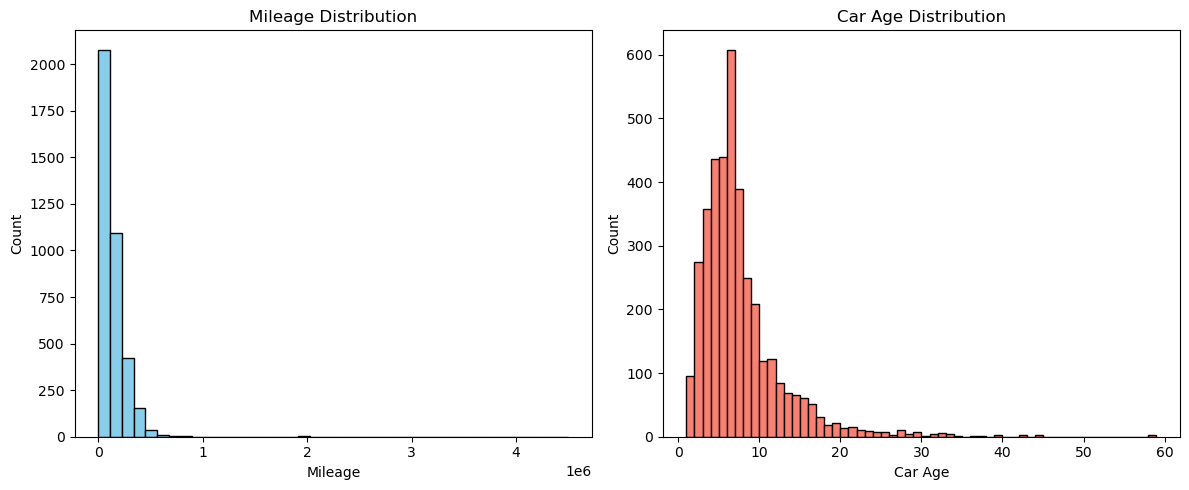

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Mileage distribution
axes[0].hist(df['Mileage'], bins=40, color='skyblue', edgecolor='black')
axes[0].set_title('Mileage Distribution')
axes[0].set_xlabel('Mileage')
axes[0].set_ylabel('Count')

# Car_Age distribution
axes[1].hist(df['Car_Age'], bins=range(df['Car_Age'].min(), df['Car_Age'].max() + 1), color='salmon', edgecolor='black')
axes[1].set_title('Car Age Distribution')
axes[1].set_xlabel('Car Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [43]:
# -- Log Transform for Skewed Numeric Features (Optional, for linear models) --
df['log_Mileage'] = np.log1p(df['Mileage'])
# Tree-based models (CatBoost, LightGBM) don't require this, but keep for benchmarking
display(df[['log_Mileage', 'Mileage']].sort_values(by='log_Mileage').head())
display(df[['log_Mileage', 'Mileage']].sort_values(by='log_Mileage').tail())

,log_Mileage,Mileage
2640,4.615121,100
3086,4.615121,100
2091,4.615121,100
3398,4.615121,100
573,4.615121,100


,log_Mileage,Mileage
3309,14.962913,3150000
622,14.972393,3180003
3090,15.009433,3300000
954,15.068274,3500000
383,15.319588,4500000


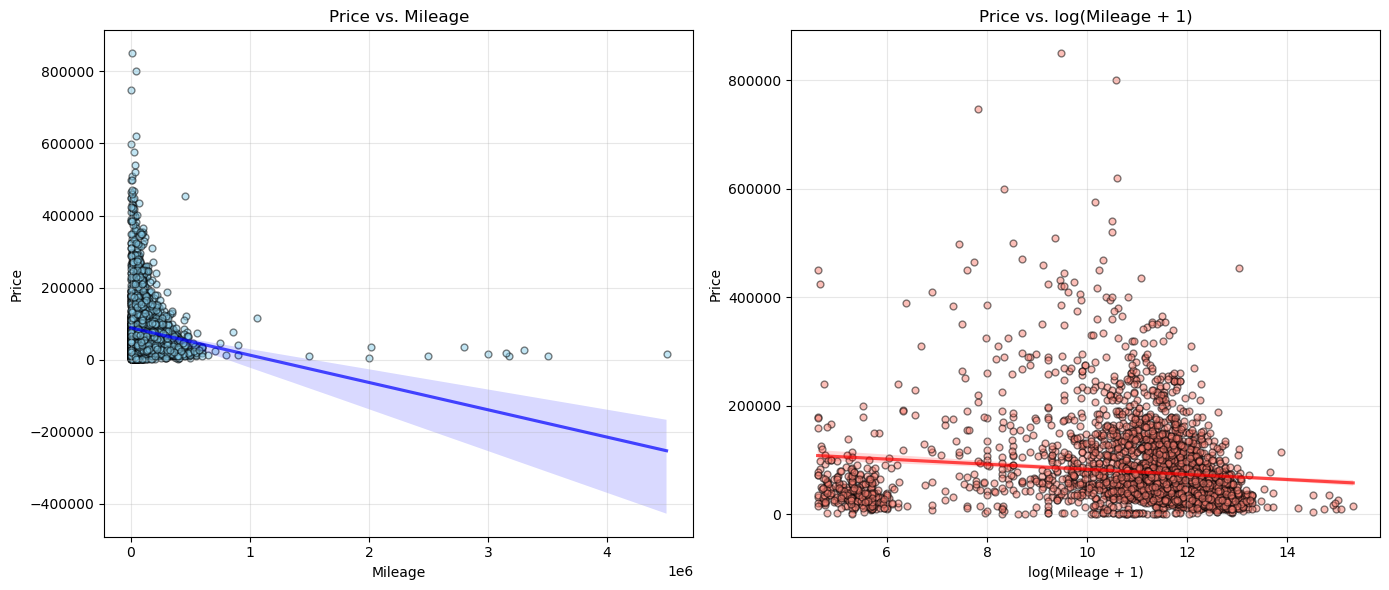

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatterplot + regplot: Mileage vs Price
axes[0].scatter(df['Mileage'], df['Price'], alpha=0.5, color='skyblue', edgecolor='k', s=24)
sns.regplot(x='Mileage', y='Price', data=df, scatter=False, ax=axes[0], color='blue', line_kws={'alpha':0.7})
axes[0].set_title('Price vs. Mileage')
axes[0].set_xlabel('Mileage')
axes[0].set_ylabel('Price')
axes[0].grid(alpha=0.3)

# Scatterplot + regplot: log_Mileage vs Price
axes[1].scatter(df['log_Mileage'], df['Price'], alpha=0.5, color='salmon', edgecolor='k', s=24)
sns.regplot(x='log_Mileage', y='Price', data=df, scatter=False, ax=axes[1], color='red', line_kws={'alpha':0.7})
axes[1].set_title('Price vs. log(Mileage + 1)')
axes[1].set_xlabel('log(Mileage + 1)')
axes[1].set_ylabel('Price')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Feature Selection

In [10]:
# -- Drop Columns Not Needed for Modeling --
drop_cols = ['Negotiable', 'Mileage_per_Year', 'Unnatural_High_Mileage_Flag', 'Year']
for col in drop_cols:
    if col in df.columns:
        df = df.drop(columns=col)
# Negotiable: already removed from pipeline.
# Mileage_per_Year, Unnatural_High_Mileage_Flag: only for outlier detection, not features.
# Year: we already created 'Car_Age' from it, so it's redundant.

df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Price,Car_Age,IsVintage,IsBigEngine,log_Mileage
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,8.0,80000,120000,8,False,True,11.289794
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,5.0,140000,260000,7,False,False,11.849405
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2.4,220000,42000,7,False,False,12.301387
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2.0,25000,58000,3,False,False,10.126671
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,4.8,189000,85000,10,False,False,12.149508


In [11]:
cat_cols, num_cols, skewed_cols, low_card_cat, high_card_cat = analyze_features(df)

Categorical variables: ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'IsVintage', 'IsBigEngine']
Numerical variables: ['Engine_Size', 'Mileage', 'Car_Age', 'log_Mileage']
Target variable: Price
Highly skewed numeric columns: ['Mileage', 'Car_Age', 'log_Mileage']

>> category cardinalities:
   Type        : 320 categories
   Region      : 27 categories
   Make        : 56 categories
   Gear_Type   : 2 categories
   Origin      : 4 categories
   Options     : 3 categories
   IsVintage   : 2 categories
   IsBigEngine : 2 categories

>> low-cardinal cats: ['Gear_Type', 'Origin', 'Options', 'IsVintage', 'IsBigEngine']
>> high-cardinal cats: ['Type', 'Region', 'Make']
>> numeric cols:      ['Engine_Size', 'Mileage', 'Car_Age', 'log_Mileage']
>> skewed cols:      ['Mileage', 'Car_Age', 'log_Mileage']


Pipeline for Feature Selection

In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class DropColumns(BaseEstimator, TransformerMixin):
#     """Transformer to drop a fixed list of columns."""
#     def __init__(self, columns):
#         self.columns = columns

#     def fit(self, X, y=None):
#         # nothing to learn
#         return self

#     def transform(self, X):
#         # we expect X to be a DataFrame
#         return X.drop(columns=self.columns, errors="ignore")

Pipeline for Feature Engineering

In [13]:
# from sklearn.base import BaseEstimator, TransformerMixin

# CURRENT_YEAR = 2022

# class FeatureEngineer(BaseEstimator, TransformerMixin):
#     def __init__(self, current_year=CURRENT_YEAR):
#         self.current_year = current_year

#     def fit(self, X, y=None):
#         # nothing to learn
#         return self

    # def transform(self, X):
    #     # take a DataFrame (raw CSV) and return engineered DataFrame
    #     df = X.copy()

    #     # 1) Car age
    #     df["Car_Age"] = self.current_year - df["Year"]

    #     # 2) Vintage flag
    #     df["IsVintage"] = (df["Car_Age"] >= 30)

    #     # 3) Big engine flag ( >7L )
    #     df["IsBigEngine"] = (df["Engine_Size"] > 7.0)

    #     # 4) drop unused
    #     df = df.drop(columns=["Negotiable", "Mileage_per_Year", 
    #                           "Unnatural_High_Mileage_Flag", "Year"],
    #                  errors="ignore")

#         return df

The code for feature engineering above has been moved to `custom_pipeline_utils.py` to allow the model's joblib file to be accessible from other files.

To use it, simply import it below.

In [ ]:
from custom_pipeline_utils import FeatureEngineer, DropColumns

In [ ]:
FeatureEngineer = FeatureEngineer()
FeatureEngineer

FeatureEngineer()

In [ ]:
DropColumns = DropColumns()
DropColumns

In [ ]:
# -----------------------------------------------------------
# Save Feature-Engineered Data (For Manual Inspection Only)
# -----------------------------------------------------------
df.to_csv(OUTPUT_PATH, index=False)
print(f"Feature engineered data saved to {OUTPUT_PATH}")

# Reminder: For real modeling, pipeline will be used to engineer features, not this CSV

Feature engineered data saved to ../data/feature_engineered_saudi_used_cars.csv
